# Analyse des fichiers  pollen 

# 1)  Analyse du fichier pollen aprés preprocessing pour la période Fev -> Mai 

- Analyse descriptive 

- Analyse de la colonne "arbres_wieght" qui représente le pollen par segment

- Analysde d ela colonne "length" qui représente la longueur par segment

# 2)  Analyse du fichier pollen aprés preprocessing pour la période Juin -> Janvier  

- Analyse descriptive 

- Analyse de la colonne "arbres_wieght" qui représente le pollen par segment

- Analysde d ela colonne "length" qui représente la longueur par segment

# 3) Analyse du fichier pollen aprés score 

- Analyse descriptive 
- Analyse de la colonne "Score_distance_pollen" qui représente le pollen par segment 
- Analyse de la colonne "length" qui représente la longueur par segment 

# 4)  Relation entre score_distance_pollen et length

- Corrélation 

### Importation des librairies 

In [3]:
import sys
sys.path.append("../")

sys.path.append("../../../script_python")
from data_utils import *
from function_utils import *

sys.path.append("../../../")
from global_variable import *
import os

os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd
import random
import pandas as pd
import multiprocessing as mp
import numpy as np
import osmnx as ox
import json
import networkx as nx
import pickle
import matplotlib
from scipy.stats import pearsonr, gamma, kstest, ks_2samp, wilcoxon
from scipy.stats import ttest_rel, ttest_ind
from scipy.stats import friedmanchisquare
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import scipy.stats as scs
import scipy.stats as stats


### Importattion du fichier arbres_preprocessing FEVRIER à MAI

In [4]:
edges_buffer_arbres_pollen_prop_path_fevmai = globpath("./score_calculation_it/output_data/network/edges/edges_buffer_arbres_pollen_prop_path_fevmai.gpkg")
pollen_pre_fm = gpd.read_file(edges_buffer_arbres_pollen_prop_path_fevmai)
pollen_pre_fm.head()

,u,v,key,osmid,oneway,name,highway,maxspeed,reversed,length,...,bridge,ref,junction,service,access,tunnel,est_width,area,arbres_weight,geometry
0,143403,21714981,0,120412669,False,Rue Professeur Morat,residential,30,False,12.119,...,,,,,,,,,3.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
1,143403,9226919131,0,521119804,True,Avenue Jean Mermoz,primary,50,False,26.495,...,,,,,,,,,3.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
2,143403,9226887756,0,120412669,False,Rue Professeur Morat,residential,30,True,10.536,...,,,,,,,,,3.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
3,143403,10810932922,0,521119804,True,Avenue Jean Mermoz,primary,50,False,15.631,...,,,,,,,,,3.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
4,21714981,9226922647,0,4087154,True,Rue Professeur Morat,unclassified,30,False,8.969,...,,,,,,,,,3.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."


In [5]:
pollen_pre_fm.columns

Index(['u', 'v', 'key', 'osmid', 'oneway', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'from', 'to', 'lanes', 'width', 'bridge', 'ref',
       'junction', 'service', 'access', 'tunnel', 'est_width', 'area',
       'arbres_weight', 'geometry'],
      dtype='object')

In [6]:
nb_line = pollen_pre_fm.shape[0] 
nb_col = pollen_pre_fm.shape[1]  

print(f"Nombre de lignes dans bruit: {nb_line}")
print(f"Nombre de colonnes dans bruit: {nb_col}")

Nombre de lignes dans bruit: 227253
Nombre de colonnes dans bruit: 24


In [7]:
pollen_pre_fm.dtypes

u                   int64
v                   int64
key                 int64
osmid              object
oneway               bool
name               object
highway            object
maxspeed           object
reversed           object
length            float64
from                int64
to                  int64
lanes              object
width              object
bridge             object
ref                object
junction           object
service            object
access             object
tunnel             object
est_width          object
area               object
arbres_weight     float64
geometry         geometry
dtype: object

In [8]:
pollen_pre_fm.describe()

,u,v,key,length,from,to,arbres_weight
count,2.272530e+05,2.272530e+05,227253.000000,227253.000000,2.272530e+05,2.272530e+05,227253.000000
mean,5.147350e+09,6.583365e+09,0.016444,50.933184,6.417055e+09,5.313660e+09,0.820711
std,4.268029e+09,4.246187e+09,0.169117,80.478364,4.322890e+09,4.240416e+09,1.317847
min,1.434030e+05,1.434350e+05,0.000000,0.011000,1.434030e+05,1.434030e+05,0.000000
25%,1.366806e+09,2.428798e+09,0.000000,8.987000,2.202089e+09,1.474024e+09,0.000000
50%,3.965288e+09,6.298100e+09,0.000000,25.122000,6.067549e+09,4.120522e+09,0.000000
75%,9.248316e+09,1.134803e+10,0.000000,62.511000,1.121001e+10,9.306938e+09,2.000000
max,1.238328e+10,1.238328e+10,4.000000,3165.715000,1.238328e+10,1.238328e+10,5.000000


In [9]:
pollen_pre_fm.isnull().sum()

u                0
v                0
key              0
osmid            0
oneway           0
name             0
highway          0
maxspeed         0
reversed         0
length           0
from             0
to               0
lanes            0
width            0
bridge           0
ref              0
junction         0
service          0
access           0
tunnel           0
est_width        0
area             0
arbres_weight    0
geometry         0
dtype: int64

In [10]:
pollen_pre_fm.duplicated().sum()

0

## Analyse de la colonne arbres_wieght

In [11]:
nb_line = pollen_pre_fm['arbres_weight'].shape[0] 

print(f"Nombre de lignes dans 'arbres_weight': {nb_line}")

Nombre de lignes dans 'arbres_weight': 227253


In [12]:
pollen_pre_fm['arbres_weight'].describe()

count    227253.000000
mean          0.820711
std           1.317847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           5.000000
Name: arbres_weight, dtype: float64

Détection des valeurs aberrantes ou atypiques (OUTLIERS)

Méthode 1 : Regarder si les valeurs sont en dehors de l'intervalle (Q1 - 1.5 x IQR, Q3 +1.5 x IQR)


In [13]:
# Calcul 
Q1 = pollen_pre_fm['arbres_weight'].quantile(0.25)
Q3 = pollen_pre_fm['arbres_weight'].quantile(0.75)
IQR = Q3 - Q1

# Définir limites basse et haute
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détection des valeurs aberrantes
outliers = pollen_pre_fm[(pollen_pre_fm['arbres_weight']< lower_bound) | (pollen_pre_fm['arbres_weight']> upper_bound)]

print(f"Valeurs aberrantes détectées :\n{outliers}")

Valeurs aberrantes détectées :
Empty GeoDataFrame
Columns: [u, v, key, osmid, oneway, name, highway, maxspeed, reversed, length, from, to, lanes, width, bridge, ref, junction, service, access, tunnel, est_width, area, arbres_weight, geometry]
Index: []

[0 rows x 24 columns]


Text(0, 0.5, 'occurence')

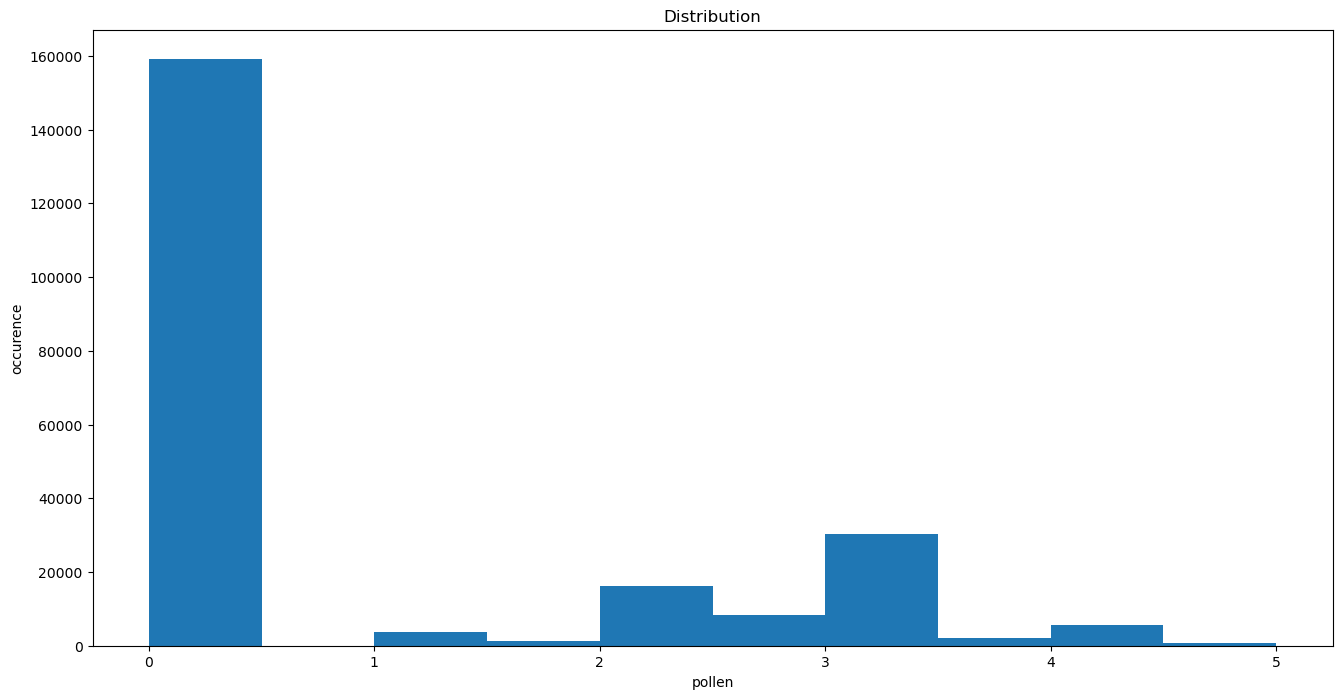

In [14]:
plt.figure(figsize=(16,8))
plt.hist(pollen_pre_fm['arbres_weight'])
plt.title("Distribution")
plt.xlabel('pollen')
plt.ylabel('occurence')

count    227253.000000
mean          0.820711
std           1.317847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           5.000000
Name: arbres_weight, dtype: float64

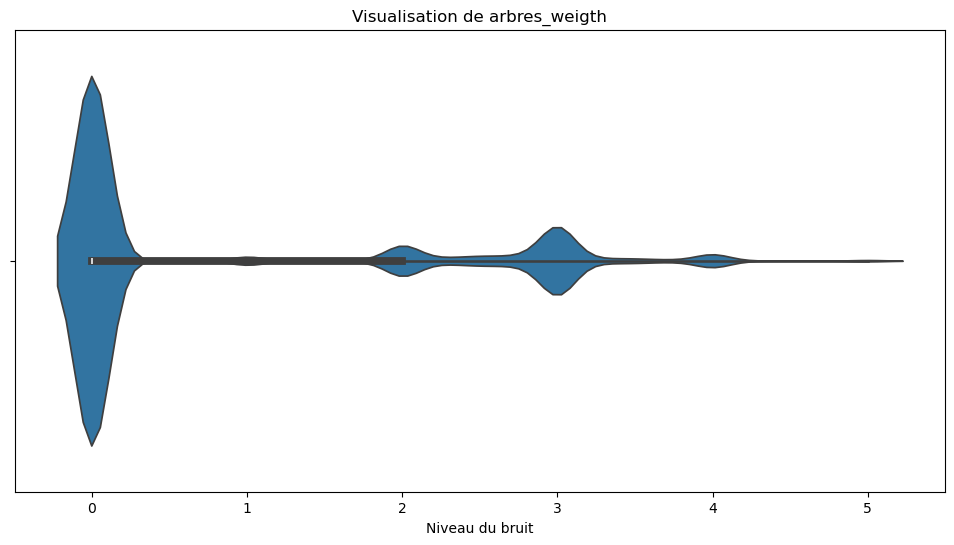

In [15]:
# Remplacer par un diagramme en violon

plt.figure(figsize=(12,6))
sns.violinplot(data=pollen_pre_fm, x='arbres_weight')
plt.xlabel('Niveau du bruit')
plt.title('Visualisation de arbres_weigth')  
pollen_pre_fm['arbres_weight'].describe()

(0.0, 7.0)

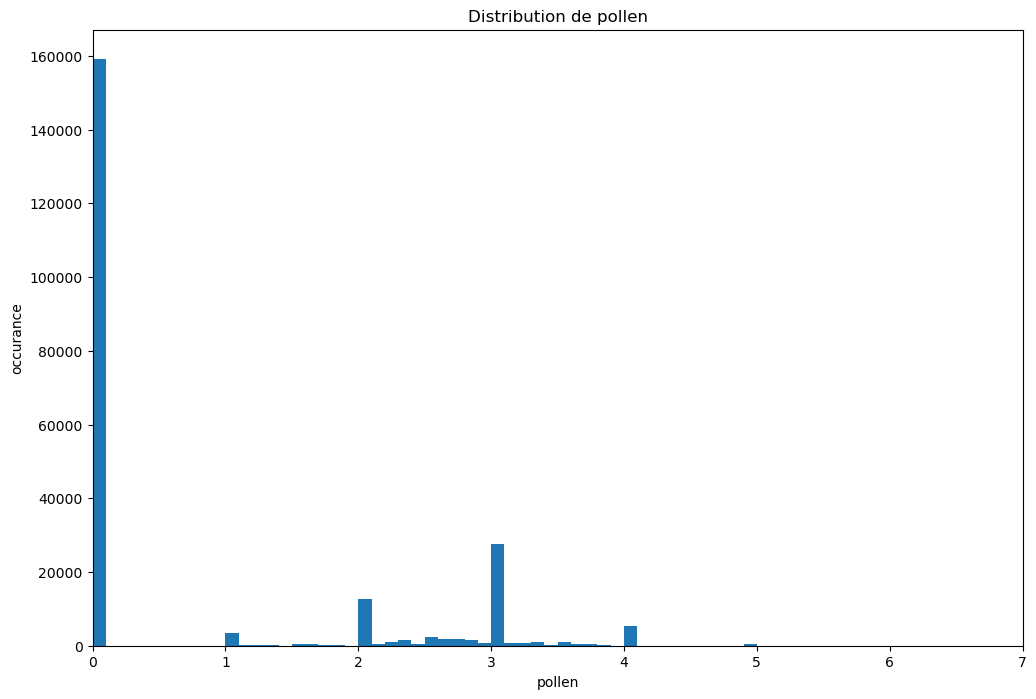

In [16]:
plt.figure(figsize=(12,8))
plt.hist(pollen_pre_fm['arbres_weight'], bins=50)
plt.title("Distribution de pollen")
plt.xlabel('pollen')
plt.ylabel('occurance')
plt.xlim(0, 7)

### Analyse de la colonne length

In [17]:
nb_line = pollen_pre_fm['length'].shape[0] 

print(f"Nombre de lignes dans 'length': {nb_line}")

Nombre de lignes dans 'length': 227253


In [18]:
pollen_pre_fm['length'].duplicated().sum()

112525

In [19]:
pollen_pre_fm['length'].describe()

count    227253.000000
mean         50.933184
std          80.478364
min           0.011000
25%           8.987000
50%          25.122000
75%          62.511000
max        3165.715000
Name: length, dtype: float64

(0.0, 20.0)

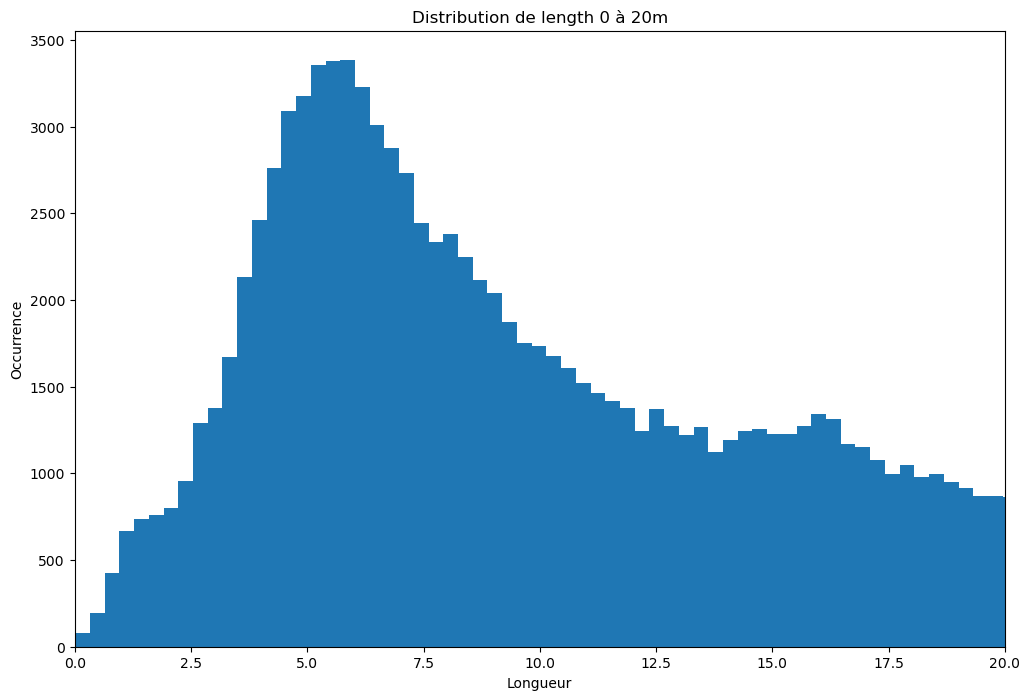

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(pollen_pre_fm['length'], bins=10000)
plt.title("Distribution de length 0 à 20m")
plt.xlabel('Longueur')
plt.ylabel('Occurrence')
plt.xlim(0, 20)

(20.0, 100.0)

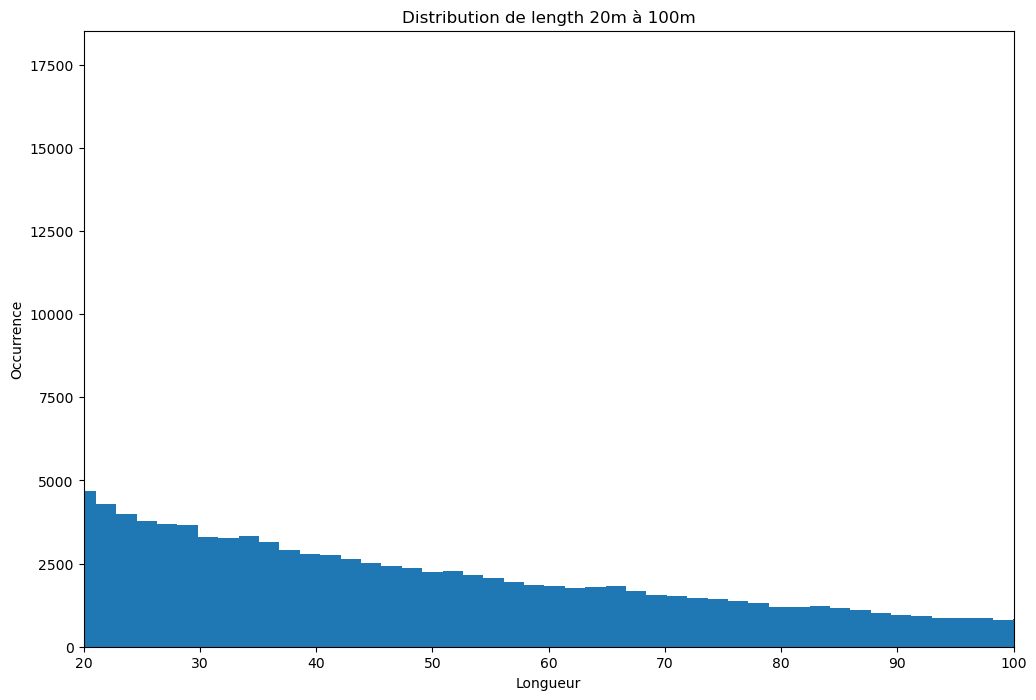

In [21]:
plt.figure(figsize=(12, 8))
plt.hist(pollen_pre_fm['length'], bins='auto') 
plt.title("Distribution de length 20m à 100m")
plt.xlabel('Longueur')
plt.ylabel('Occurrence')
plt.xlim(20, 100)

## Analyse du fichier pollen janv à juin

In [22]:
edges_buffer_arbres_pollen_prop_path = globpath("./score_calculation_it/output_data/network/edges/edges_buffer_arbres_pollen_prop_path.gpkg")
pollen_pre = gpd.read_file(edges_buffer_arbres_pollen_prop_path)

pollen_pre.head()

,u,v,key,osmid,oneway,name,highway,maxspeed,reversed,length,...,nom,theme,soustheme,identifiant,idexterne,siret,datecreation,gid,arbres_weight,geometry
0,143403,21714981,0,120412669,False,Rue Professeur Morat,residential,30,False,12.119,...,Métropole de Lyon,ADMINISTRATION,Métropole,S5759,69M,20004697700019,2014-11-14,5956,0.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
1,143403,9226919131,0,521119804,True,Avenue Jean Mermoz,primary,50,False,26.495,...,Métropole de Lyon,ADMINISTRATION,Métropole,S5759,69M,20004697700019,2014-11-14,5956,0.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
2,143403,9226887756,0,120412669,False,Rue Professeur Morat,residential,30,True,10.536,...,Métropole de Lyon,ADMINISTRATION,Métropole,S5759,69M,20004697700019,2014-11-14,5956,0.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
3,143403,10810932922,0,521119804,True,Avenue Jean Mermoz,primary,50,False,15.631,...,Métropole de Lyon,ADMINISTRATION,Métropole,S5759,69M,20004697700019,2014-11-14,5956,0.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
4,21714981,9226922647,0,4087154,True,Rue Professeur Morat,unclassified,30,False,8.969,...,Métropole de Lyon,ADMINISTRATION,Métropole,S5759,69M,20004697700019,2014-11-14,5956,0.0,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."


In [23]:
pollen_pre.columns 

Index(['u', 'v', 'key', 'osmid', 'oneway', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'from', 'to', 'lanes', 'width', 'bridge', 'ref',
       'junction', 'service', 'access', 'tunnel', 'est_width', 'area', 'id',
       'nom', 'theme', 'soustheme', 'identifiant', 'idexterne', 'siret',
       'datecreation', 'gid', 'arbres_weight', 'geometry'],
      dtype='object')

In [24]:
nb_line = pollen_pre.shape[0] 
nb_col = pollen_pre.shape[1]  

print(f"Nombre de lignes dans bruit: {nb_line}")
print(f"Nombre de colonnes dans bruit: {nb_col}")

Nombre de lignes dans bruit: 209441
Nombre de colonnes dans bruit: 33


In [25]:
pollen_pre.dtypes

u                   int64
v                   int64
key                 int64
osmid              object
oneway               bool
name               object
highway            object
maxspeed           object
reversed           object
length            float64
from                int64
to                  int64
lanes              object
width              object
bridge             object
ref                object
junction           object
service            object
access             object
tunnel             object
est_width          object
area               object
id                 object
nom                object
theme              object
soustheme          object
identifiant        object
idexterne          object
siret              object
datecreation       object
gid                 int64
arbres_weight     float64
geometry         geometry
dtype: object

In [26]:
pollen_pre.isnull().sum()

u                0
v                0
key              0
osmid            0
oneway           0
name             0
highway          0
maxspeed         0
reversed         0
length           0
from             0
to               0
lanes            0
width            0
bridge           0
ref              0
junction         0
service          0
access           0
tunnel           0
est_width        0
area             0
id               0
nom              0
theme            0
soustheme        0
identifiant      0
idexterne        0
siret            0
datecreation     0
gid              0
arbres_weight    0
geometry         0
dtype: int64

In [27]:
pollen_pre.duplicated().sum()

0

In [28]:
pollen_pre.describe()

,u,v,key,length,from,to,gid,arbres_weight
count,2.094410e+05,2.094410e+05,209441.000000,209441.000000,2.094410e+05,2.094410e+05,209441.0,209441.000000
mean,5.246434e+09,6.707972e+09,0.015866,47.918176,6.536575e+09,5.417831e+09,5956.0,0.094703
std,4.305330e+09,4.263122e+09,0.166731,74.245192,4.347253e+09,4.272436e+09,0.0,0.427626
min,1.434030e+05,1.434350e+05,0.000000,0.011000,1.434030e+05,1.434030e+05,5956.0,0.000000
25%,1.383187e+09,2.485985e+09,0.000000,8.545000,2.233802e+09,1.500109e+09,5956.0,0.000000
50%,4.065145e+09,6.427239e+09,0.000000,23.538000,6.283640e+09,4.228968e+09,5956.0,0.000000
75%,9.320983e+09,1.145417e+10,0.000000,59.784000,1.141553e+10,9.474214e+09,5956.0,0.000000
max,1.238328e+10,1.238328e+10,4.000000,3165.715000,1.238328e+10,1.238328e+10,5956.0,3.000000


### Analyse de la colonne arbres_weight

In [29]:
nb_line = pollen_pre['arbres_weight'].shape[0] 

print(f"Nombre de lignes dans 'arbres_weight': {nb_line}")

Nombre de lignes dans 'arbres_weight': 209441


In [30]:
pollen_pre['arbres_weight'].describe()

count    209441.000000
mean          0.094703
std           0.427626
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: arbres_weight, dtype: float64

In [31]:
# Calcul 
Q1 = pollen_pre['arbres_weight'].quantile(0.25)
Q3 = pollen_pre['arbres_weight'].quantile(0.75)
IQR = Q3 - Q1

# Définir limites basse et haute
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détection des valeurs aberrantes
outliers = pollen_pre[(pollen_pre['arbres_weight'] < lower_bound) | (pollen_pre['arbres_weight'] > upper_bound)]

print(f"Valeurs aberrantes détectées :\n{outliers}")

Valeurs aberrantes détectées :
                  u            v  key       osmid  oneway              name  \
23           143412   8900201142    0   254263664   False        Rue Villon   
24           143412   8360807451    0   945392415    True  Avenue Berthelot   
25           143412   8360807456    0   484459262    True        Rue Villon   
26           143412   8360807461    0   234025007    True  Avenue Berthelot   
27       8900201142   8752289484    0   254263664   False        Rue Villon   
...             ...          ...  ...         ...     ...               ...   
208848  12153825261  12153825259    0  1313044457   False                     
209313  12289390725  12290574380    0  1328292307   False                     
209314  12289390725  12290574384    0  1328292307   False                     
209331  12291555143  12291555136    0  1328534056   False                     
209333  12291555136  12291555137    0  1328534055   False                     

            highway 

Text(0, 0.5, 'occurence')

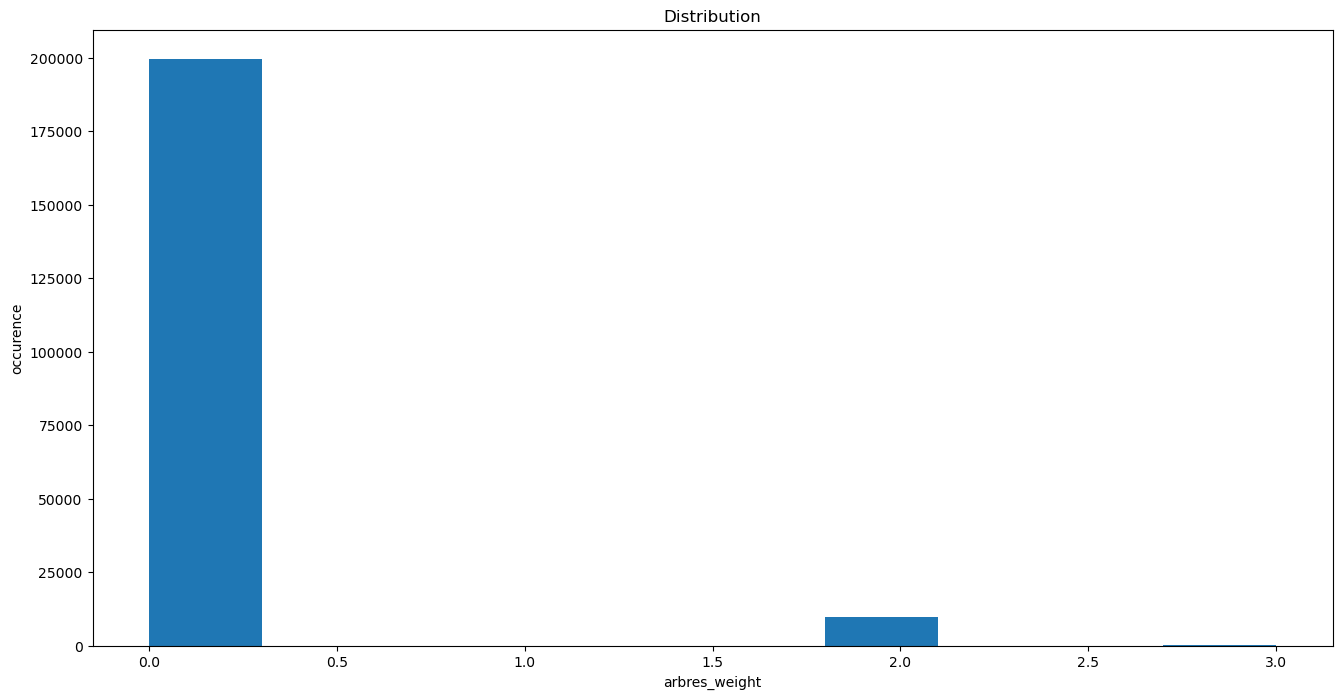

In [32]:
plt.figure(figsize=(16,8))
plt.hist(pollen_pre['arbres_weight'])
plt.title("Distribution")
plt.xlabel('arbres_weight')
plt.ylabel('occurence')

count    209441.000000
mean          0.094703
std           0.427626
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: arbres_weight, dtype: float64

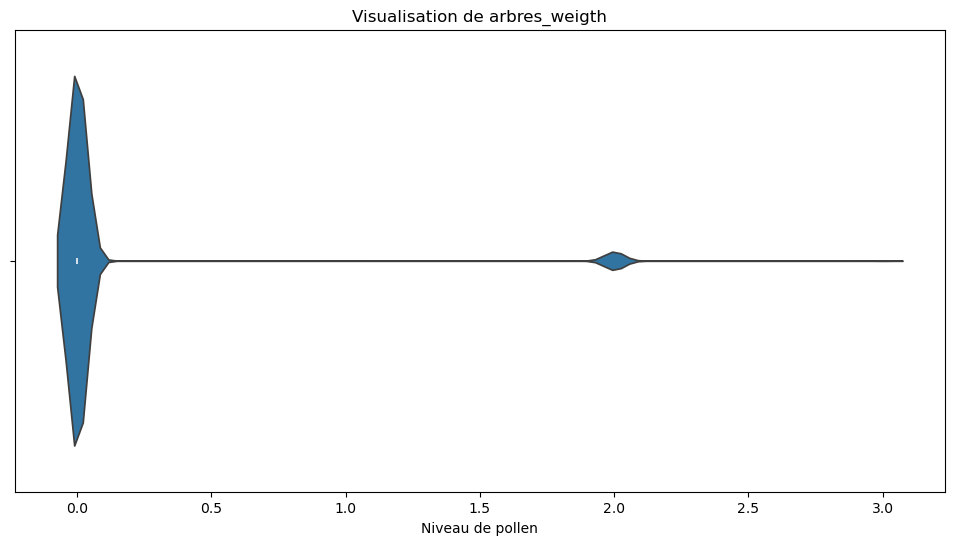

In [33]:
# Remplacer par un diagramme en violon

plt.figure(figsize=(12,6))
sns.violinplot(data=pollen_pre, x='arbres_weight')
plt.xlabel('Niveau de pollen')
plt.title('Visualisation de arbres_weigth')  
pollen_pre['arbres_weight'].describe()

### Analyse de la colonne length

In [34]:
pollen_pre['length'].describe()

count    209441.000000
mean         47.918176
std          74.245192
min           0.011000
25%           8.545000
50%          23.538000
75%          59.784000
max        3165.715000
Name: length, dtype: float64

# Analyse du fichier score pollen janv à juin

In [35]:
edges_buffer_total_score_distance_pollen_path = globpath("./score_calculation_it/output_data/network/edges/edges_buffered_total_score_distance_pollen_bounding.gpkg")
score_pollen_pre = gpd.read_file(edges_buffer_total_score_distance_pollen_path)

score_pollen_pre.head()

,u,v,key,osmid,oneway,name,highway,maxspeed,reversed,length,...,access,tunnel,est_width,area,score_pollen_arbres_weight,score_pollen_parcs_prop,total_score_pollen,score_distance_pollen,pollen_score,geometry
0,143403,21714981,0,120412669,False,Rue Professeur Morat,residential,30,False,12.119,...,,,,,3.0,0.0,4.0,48.476,9.96,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
1,143403,9226919131,0,521119804,True,Avenue Jean Mermoz,primary,50,False,26.495,...,,,,,3.0,0.0,4.0,105.980,9.91,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
2,143403,9226887756,0,120412669,False,Rue Professeur Morat,residential,30,True,10.536,...,,,,,3.0,0.0,4.0,42.144,9.96,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
3,143403,10810932922,0,521119804,True,Avenue Jean Mermoz,primary,50,False,15.631,...,,,,,3.0,0.0,4.0,62.524,9.95,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."
4,21714981,9226922647,0,4087154,True,Rue Professeur Morat,unclassified,30,False,8.969,...,,,,,3.0,0.0,4.0,35.876,9.97,"POLYGON ((1.85e+06 5.17e+06, 1.85e+06 5.17e+06..."


In [36]:
score_pollen_pre.columns

Index(['u', 'v', 'key', 'osmid', 'oneway', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'from', 'to', 'lanes', 'width', 'bridge', 'ref',
       'junction', 'service', 'access', 'tunnel', 'est_width', 'area',
       'score_pollen_arbres_weight', 'score_pollen_parcs_prop',
       'total_score_pollen', 'score_distance_pollen', 'pollen_score',
       'geometry'],
      dtype='object')

In [37]:
nb_lines = score_pollen_pre.shape[0]
print(f"Le nombre de lignes du fichier est de :\n{nb_lines} lignes")

Le nombre de lignes du fichier est de :
227253 lignes


In [38]:
score_pollen_pre.dtypes

u                                int64
v                                int64
key                              int64
osmid                           object
oneway                            bool
name                            object
highway                         object
maxspeed                        object
reversed                        object
length                         float64
from                             int64
to                               int64
lanes                           object
width                           object
bridge                          object
ref                             object
junction                        object
service                         object
access                          object
tunnel                          object
est_width                       object
area                            object
score_pollen_arbres_weight     float64
score_pollen_parcs_prop        float64
total_score_pollen             float64
score_distance_pollen    

In [39]:
score_pollen_pre.duplicated().sum()

0

In [40]:
score_pollen_pre.isnull().sum()

u                                 0
v                                 0
key                               0
osmid                             0
oneway                            0
name                              0
highway                           0
maxspeed                          0
reversed                          0
length                            0
from                              0
to                                0
lanes                             0
width                             0
bridge                            0
ref                               0
junction                          0
service                           0
access                            0
tunnel                            0
est_width                         0
area                              0
score_pollen_arbres_weight        0
score_pollen_parcs_prop       17812
total_score_pollen                0
score_distance_pollen             0
pollen_score                      0
geometry                    

In [41]:
score_pollen_pre.describe()

,u,v,key,length,from,to,score_pollen_arbres_weight,score_pollen_parcs_prop,total_score_pollen,score_distance_pollen,pollen_score
count,2.272530e+05,2.272530e+05,227253.000000,227253.000000,2.272530e+05,2.272530e+05,227253.000000,209441.000000,227253.000000,227253.000000,227253.000000
mean,5.147350e+09,6.583365e+09,0.016444,50.933184,6.417055e+09,5.313660e+09,0.820711,0.613538,2.386160,118.064847,9.901308
std,4.268029e+09,4.246187e+09,0.169117,80.478364,4.322890e+09,4.240416e+09,1.317847,1.640510,2.057899,257.574465,0.215608
min,1.434030e+05,1.434350e+05,0.000000,0.011000,1.434030e+05,1.434030e+05,0.000000,0.000000,1.000000,0.011000,0.000000
25%,1.366806e+09,2.428798e+09,0.000000,8.987000,2.202089e+09,1.474024e+09,0.000000,0.000000,1.000000,15.988000,9.910000
50%,3.965288e+09,6.298100e+09,0.000000,25.122000,6.067549e+09,4.120522e+09,0.000000,0.000000,1.000000,41.915000,9.960000
75%,9.248316e+09,1.134803e+10,0.000000,62.511000,1.121001e+10,9.306938e+09,2.000000,0.000000,4.000000,113.427000,9.990000
max,1.238328e+10,1.238328e+10,4.000000,3165.715000,1.238328e+10,1.238328e+10,5.000000,5.000000,11.000000,11950.076000,10.000000


In [42]:
score_pollen_pre['score_distance_pollen'].describe()

count    227253.000000
mean        118.064847
std         257.574465
min           0.011000
25%          15.988000
50%          41.915000
75%         113.427000
max       11950.076000
Name: score_distance_pollen, dtype: float64

In [43]:
score_pollen_pre['length'].describe()

count    227253.000000
mean         50.933184
std          80.478364
min           0.011000
25%           8.987000
50%          25.122000
75%          62.511000
max        3165.715000
Name: length, dtype: float64

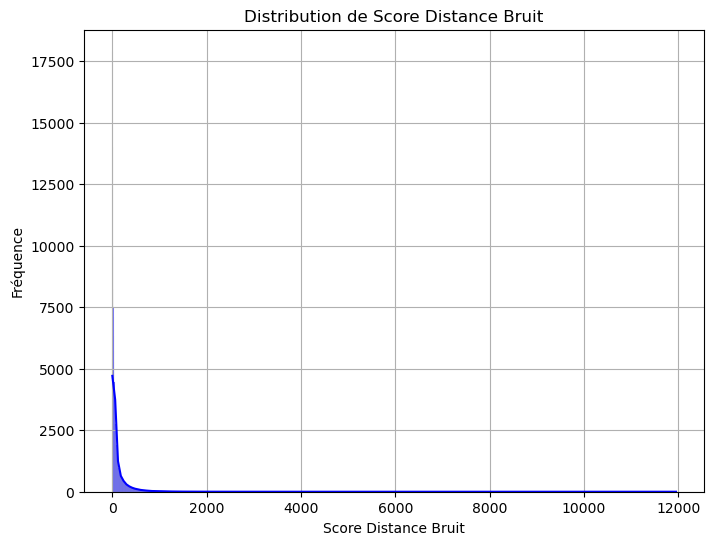

In [44]:
# Distribution de score_distance_pollen
plt.figure(figsize=(8, 6))
sns.histplot(score_pollen_pre['score_distance_pollen'], kde=True, color='blue')
plt.title('Distribution de Score Distance Bruit')
plt.xlabel('Score Distance Bruit')
plt.ylabel('Fréquence')
plt.grid()

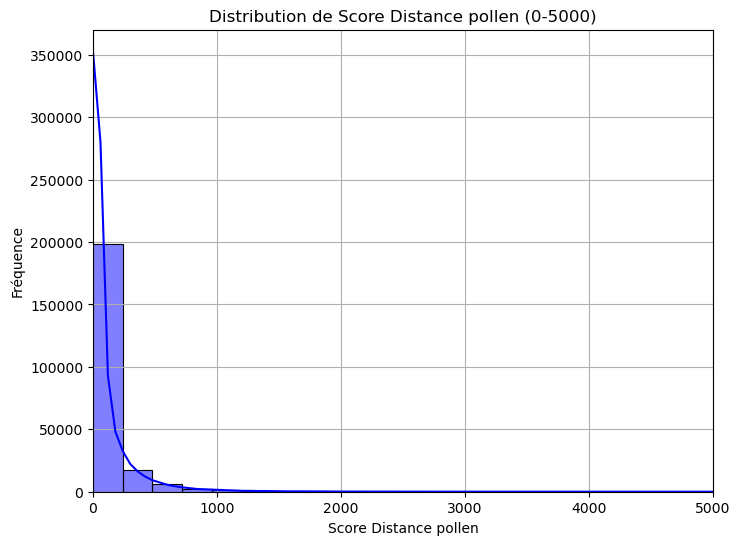

In [45]:
# Distribution de score_distance_bruit limitée à 0-5000
plt.figure(figsize=(8, 6))
sns.histplot(score_pollen_pre['score_distance_pollen'], kde=True, bins=50, color='blue')
plt.title('Distribution de Score Distance pollen (0-5000)')
plt.xlabel('Score Distance pollen')
plt.ylabel('Fréquence')
plt.xlim(0, 5000)  
plt.grid()

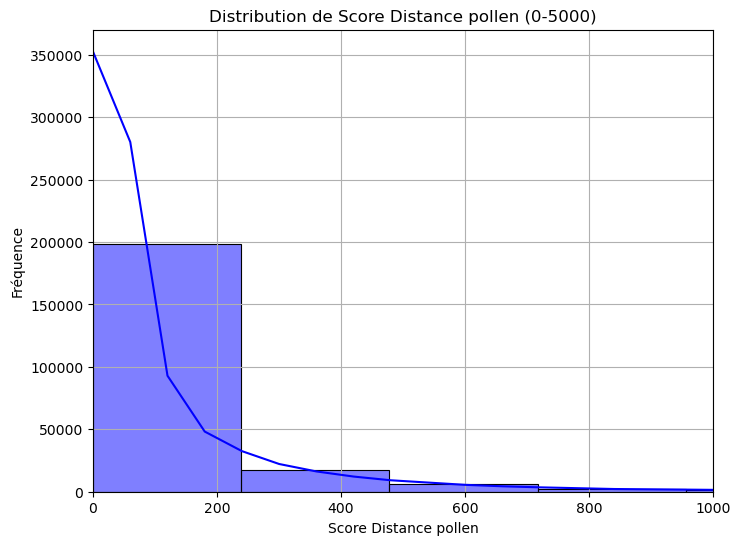

In [46]:
# Distribution de score_distance_pollen limitée à 0-1000
plt.figure(figsize=(8, 6))
sns.histplot(score_pollen_pre['score_distance_pollen'], kde=True, bins=50, color='blue')
plt.title('Distribution de Score Distance pollen (0-5000)')
plt.xlabel('Score Distance pollen')
plt.ylabel('Fréquence')
plt.xlim(0, 1000)  
plt.grid()

## Loi normale 

/home/alexandre-ober/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 227253.
  res = hypotest_fun_out(*samples, **kwds)


La p-value (2.485485458589662e-188) est inférieure à 0.05. Les données ne suivent pas une distribution normale.


(0.0, 1000.0)

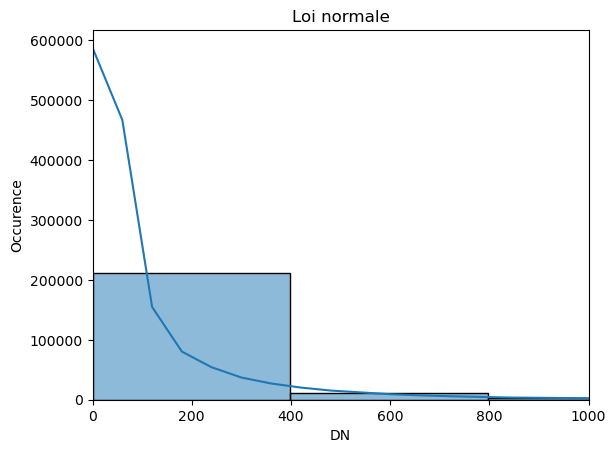

In [47]:
# Test de Shapiro-Wilk
stat, p_value = stats.shapiro(score_pollen_pre['score_distance_pollen'])
seuil = 0.05

# Décision basée sur la p-value
if p_value < seuil:
    print(f"La p-value ({p_value}) est inférieure à {seuil}. Les données ne suivent pas une distribution normale.")
else:
    print(f"La p-value ({p_value}) est supérieure à {seuil}. Les données peuvent suivre une distribution normale.")


# Histo
sns.histplot(score_pollen_pre['score_distance_pollen'], kde=True, bins=30)
plt.title('Loi normale')
plt.xlabel('DN')
plt.ylabel('Occurence')
plt.xlim(0,1000)

Text(0, 0.5, 'Q distri bruit')

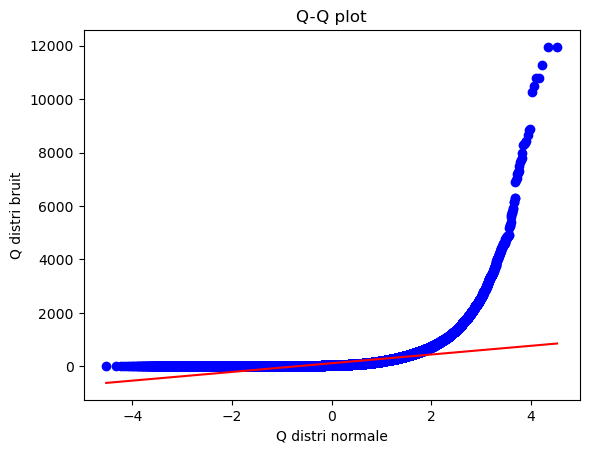

In [48]:
# Q-Q plot
stats.probplot(score_pollen_pre['score_distance_pollen'], dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.xlabel('Q distri normale')
plt.ylabel('Q distri bruit')

## Colonne Length 

(0.0, 20.0)

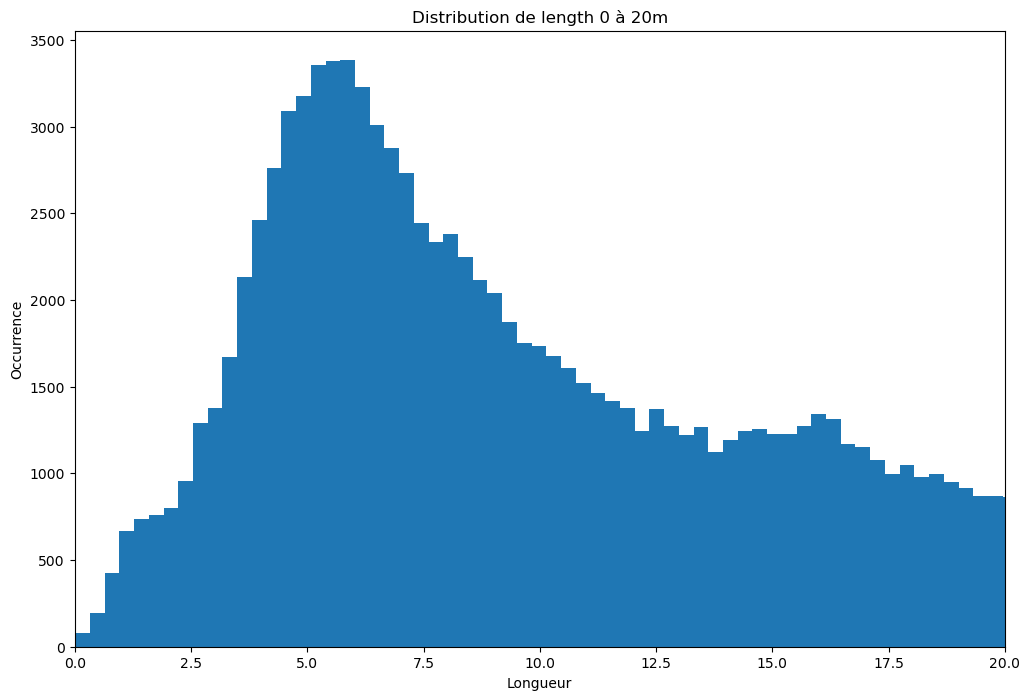

In [49]:
plt.figure(figsize=(12, 8))
plt.hist(score_pollen_pre['length'], bins=10000)
plt.title("Distribution de length 0 à 20m")
plt.xlabel('Longueur')
plt.ylabel('Occurrence')
plt.xlim(0, 20)

(20.0, 40.0)

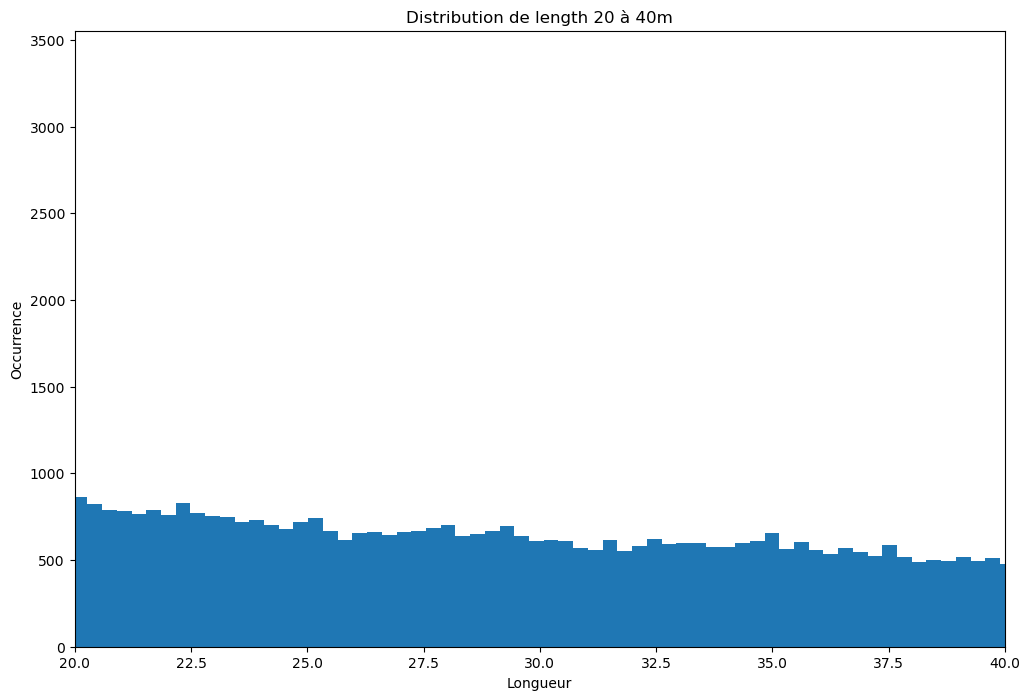

In [50]:
plt.figure(figsize=(12, 8))
plt.hist(score_pollen_pre['length'], bins=10000)
plt.title("Distribution de length 20 à 40m")
plt.xlabel('Longueur')
plt.ylabel('Occurrence')
plt.xlim(20, 40)

In [51]:
moy_l =score_pollen_pre['length'].mean()
var_l = score_pollen_pre['length'].var()
q_l = score_pollen_pre['length'].quantile([0.25, 0.5, 0.75])
min_l =score_pollen_pre['length'].min()
max_l = score_pollen_pre['length'].max()
print(f"La moyenne de la colonne du length est de :\n{moy_l} m")
print(f"La variance de la colonne du length est de :\n{var_l}")
print(f"Les quantiles de la colonne du length sont de :\n{q_l}")
print(f"Le minimum de la colonne du length est de :\n{min_l} m")
print(f"Le maximum de la colonne du length est de :\n{max_l} m")

La moyenne de la colonne du length est de :
50.933184318798865 m
La variance de la colonne du length est de :
6476.767117172967
Les quantiles de la colonne du length sont de :
0.25     8.987
0.50    25.122
0.75    62.511
Name: length, dtype: float64
Le minimum de la colonne du length est de :
0.011 m
Le maximum de la colonne du length est de :
3165.715 m


## Loi normale 

La p-value (5.7819053934037944e-179) est inférieure à 0.05. Les données ne suivent pas une distribution normale.


/home/alexandre-ober/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 227253.
  res = hypotest_fun_out(*samples, **kwds)


Text(0, 0.5, 'Occurence')

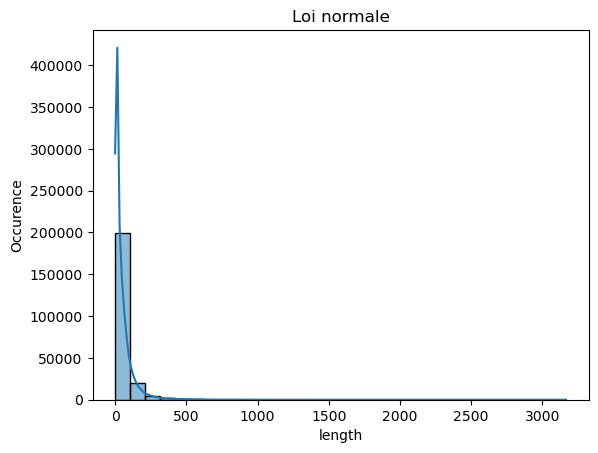

In [52]:
# Test de Shapiro-Wilk
stat, p_value = stats.shapiro(score_pollen_pre['length'])
seuil = 0.05

# Décision basée sur la p-value
if p_value < seuil:
    print(f"La p-value ({p_value}) est inférieure à {seuil}. Les données ne suivent pas une distribution normale.")
else:
    print(f"La p-value ({p_value}) est supérieure à {seuil}. Les données peuvent suivre une distribution normale.")


# Histo
sns.histplot(score_pollen_pre['length'], kde=True, bins=30)
plt.title('Loi normale')
plt.xlabel('length')
plt.ylabel('Occurence')


Text(0, 0.5, 'Q distri length')

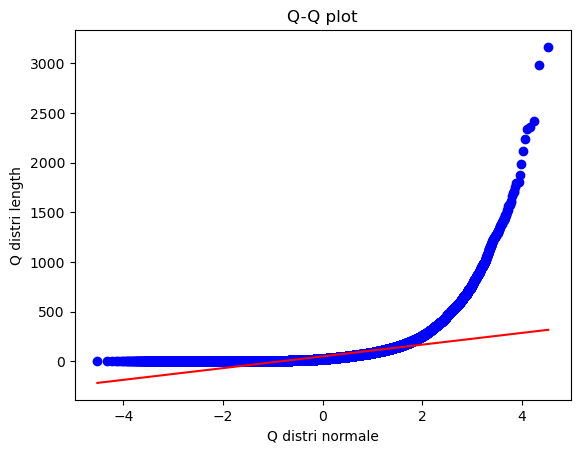

In [53]:
# Q-Q plot
stats.probplot(score_pollen_pre['length'], dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.xlabel('Q distri normale')
plt.ylabel('Q distri length')

# Relation entre score_distance_bruit et length

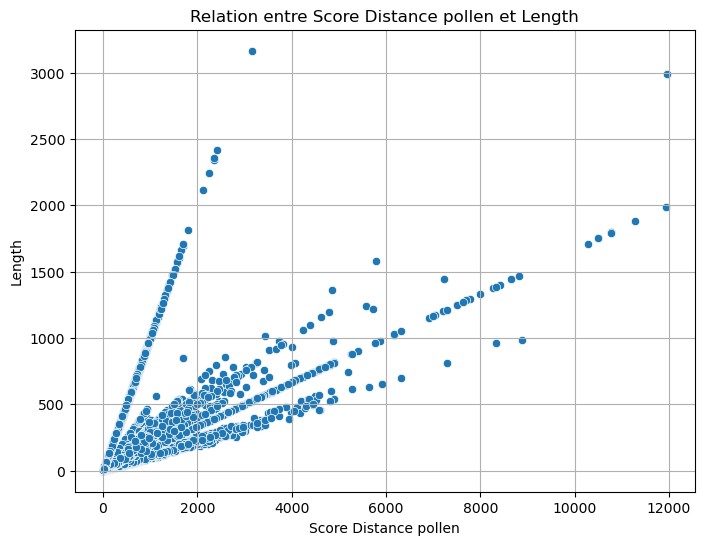

In [54]:
# Regarder la relation entre score_distance_bruit et length 

plt.figure(figsize=(8, 6))
sns.scatterplot(x='score_distance_pollen', y='length', data=score_pollen_pre)
plt.title('Relation entre Score Distance pollen et Length')
plt.xlabel('Score Distance pollen')
plt.ylabel('Length')
plt.grid()

##  Corrélation entre le score_distance_pollen et la longueur des segments 

In [55]:
corr = score_pollen_pre['score_distance_pollen'].corr(score_pollen_pre['length'])
print(f"Coefficient de corrélation : {corr}")

Coefficient de corrélation : 0.672066120920884


Text(0.5, 1.0, 'Heatmap des corrélations : Score Distance Bruit vs Length')

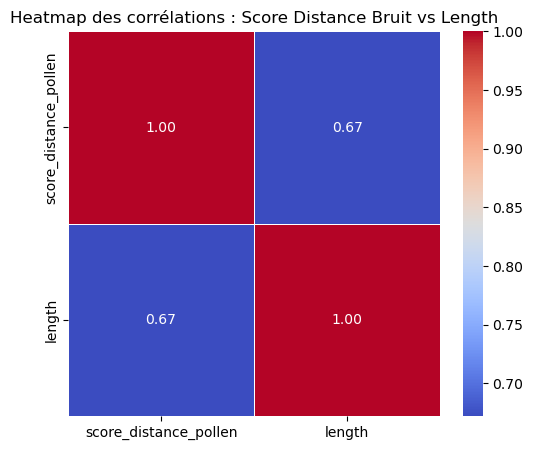

In [56]:
# Heatmap 'length' et 'score_distance_bruit'
selected_columns = ['score_distance_pollen', 'length']
correlation_matrix = score_pollen_pre[selected_columns].corr()

# graph
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap des corrélations : Score Distance Bruit vs Length')